In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1

In [2]:
n = 1000
a = np.random.normal(0, 1, (n, n))
A = a + a.T

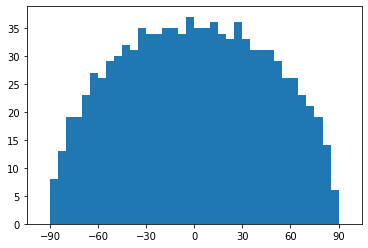

In [3]:
plt.hist(np.linalg.eigvalsh(A),
         bins=range(-95, 100, 5))
plt.xticks(range(-90, 105, 30))

plt.show()

# Задание 2

In [49]:
from scipy.linalg import hessenberg
np.set_printoptions(suppress=True)

In [50]:
n = 10
a = np.random.normal(0, 1, (n, n))
A = a @ a.T

In [51]:
min_lambda = np.linalg.eigvalsh(A)[0]
np.linalg.eigvalsh(A)

array([ 0.19387755,  0.42925423,  1.62790094,  5.97811097,  8.2823807 ,
       10.65365922, 12.35745012, 19.39265514, 33.13477317, 45.00593544])

In [52]:
H = hessenberg(A)
while not (np.allclose(np.diagonal(H, 1), 0) and np.allclose(np.diagonal(H, -1), 0)):
  q, r = np.linalg.qr(H)
  H = r @ q
np.diag(H)[::-1]

array([ 0.19387755,  0.42925423,  1.62790094,  5.97811097,  8.2823807 ,
       10.65365922, 12.35745012, 19.39265514, 33.13477317, 45.00593544])

In [53]:
H = hessenberg(A)
for i in range(1, 100):
  q, r = np.linalg.qr(H)
  H = r @ q
  if np.abs(min_lambda - H[-1,-1])/min_lambda < 0.01:
    break

print(H)
print('\nКоличество итераций:', i)

[[39.87660365 -9.7892767  -0.          0.         -0.          0.
  -0.          0.          0.         -0.        ]
 [-9.7892767  23.0037511  -7.5181602  -0.          0.         -0.
  -0.          0.          0.         -0.        ]
 [ 0.         -7.5181602  24.94735767  8.65395664 -0.          0.
  -0.         -0.         -0.          0.        ]
 [ 0.          0.          8.65395664 20.15180515  2.30197599 -0.
   0.         -0.         -0.          0.        ]
 [ 0.          0.          0.          2.30197599  7.89848846  4.14075848
   0.         -0.          0.         -0.        ]
 [ 0.          0.          0.          0.          4.14075848  5.6203662
  -2.81683758 -0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         -2.81683758
   8.64599329  1.09725963 -0.         -0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.09725963  4.06979154 -2.75324831 -0.        ]
 [ 0.          0.          0.          0.

# Задание 3

In [10]:
from scipy.optimize import root, curve_fit

In [11]:
def f(x):
  return np.sqrt(1 + 2*x + np.sqrt(1 + 4*x))/(x*np.sqrt(2))

In [12]:
def F(x):
  return f(x) - 1/0.1

sol = root(F, 0.1)
sol

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-0.00000004])
       r: array([83.33383478])
  status: 1
 success: True
       x: array([0.11])

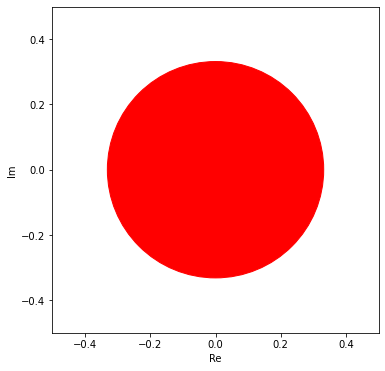

In [13]:
plt.figure(figsize=(6, 6))

circle = plt.Circle((0, 0), np.sqrt(sol.x), color='r')
plt.gca().add_patch(circle)

plt.xlim((-0.5, 0.5))
plt.ylim((-0.5, 0.5))

plt.xlabel('Re')
plt.ylabel('Im')

plt.gca().set_aspect('equal')

In [14]:
def F(x):
  return f(x) - 1/0.01

sol = root(F, 0.01)
sol

    fjac: array([[-1.]])
     fun: array([-0.])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-0.00000001])
       r: array([9803.93108021])
  status: 1
 success: True
       x: array([0.0101])

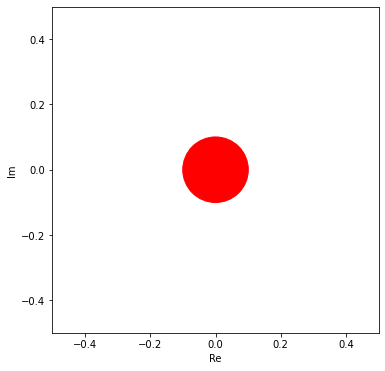

In [15]:
plt.figure(figsize=(6, 6))

circle = plt.Circle((0, 0), np.sqrt(sol.x), color='r')
plt.gca().add_patch(circle)

plt.xlim((-0.5, 0.5))
plt.ylim((-0.5, 0.5))

plt.xlabel('Re')
plt.ylabel('Im')

plt.gca().set_aspect('equal')

# Задание 4

In [16]:
def power_iter(d, v, x, eps=1e-8, maxiter=1000):
    iters = λ = 0
    y = x
    while iters < maxiter:
      iters += 1
      x = y / np.linalg.norm(y)

      y = d * x + v * (v @ x)
      new_λ = x @ y
      
      if np.abs(new_λ - λ) < eps:
        return new_λ, x, iters
      λ = new_λ
      
    return new_λ, x, iters

In [17]:
def min_eig(D, u, eps=1e-5):
  u /= np.linalg.norm(u)
  
  d_max = np.max(D)
  if d_max + 1 > 0:
    shift = d_max + 1 + eps
  else:
    shift = 0
  shifted_D = D - shift

  eigval, eigvec, _ = power_iter(shifted_D, u, np.random.normal(size=u.shape))
  return eigval + shift, eigvec

In [54]:
n = 10**2

D = np.random.normal(size=n)
u = np.random.normal(size=n)

my_val, my_vec = min_eig(D, u)
val, vec = np.linalg.eigh(np.diag(D) + np.outer(u, u.T)/(u.T @ u))
val, vec = val[0], vec[:,0]

print(my_val, val)
print(sorted(my_vec * np.sign(my_vec[0]) - vec * np.sign(vec[0]))[:5])

-2.8165477925050983 -2.8165478367217953
[-5.223874174759002e-07, -4.436807875670898e-07, -3.954326440926831e-07, -2.269163757841544e-07, -2.0826098119652858e-07]


In [19]:
n = 10**5

D = np.random.normal(size=n)
u = np.random.normal(size=n)
u /= np.linalg.norm(u)

my_val, my_vec = min_eig(D, u)

print(D * my_vec + u * (u @ my_vec))
print(my_val * my_vec)

[-0.00000133 -0.00000483 -0.00001452 ...  0.00002291 -0.00000889
  0.00001653]
[-0.00000133 -0.00000483 -0.00001452 ...  0.00002291 -0.00000889
  0.00001653]


# Задание 5

In [44]:
n = 1000
c = 1 / 2
A = np.zeros((2*n - 1, 2*n - 1))


for i in range(2*n - 1):
  A[0, i] = A[-1, 2*n - 2 -i] = c if i % 2 == 0 else 1

A[0, 0] += 2
A[-1, -1] += 2

A[0, 1] = 0
A[-1, -2] = 0


for i in range(1, 2*n - 2):
  A[i, i-1:i+2] = [-1, 2, -1]
  if i % 2 == 1:
    A[i, i-1:i+2] *= c


print(A)

[[ 2.5  0.   0.5 ...  0.5  1.   0.5]
 [-0.5  1.  -0.5 ...  0.   0.   0. ]
 [ 0.  -1.   2.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  2.  -1.   0. ]
 [ 0.   0.   0.  ... -0.5  1.  -0.5]
 [ 0.5  1.   0.5 ...  0.5  0.   2.5]]


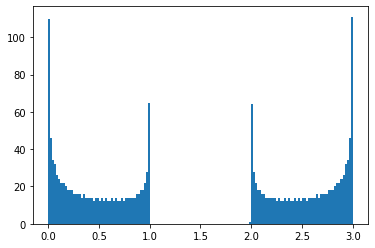

In [47]:
eigvals = np.linalg.eigvals(A)
plt.hist(np.real_if_close(eigvals), bins=150)

plt.show()

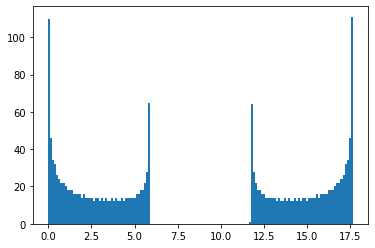

In [48]:
k = np.random.uniform(1,  10)
eigvals = np.linalg.eigvals(k * A)
lot = plt.hist(np.real_if_close(eigvals), bins=150)

plt.show()